# 查看数据集

部分code参考archie的read_dataset代码

In [1]:
# 导入库
import json, os
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
# 加载train.json文件，该文件包含了训练集中所有图片的标注信息
data_dir = './dl_detection'
anno = open(os.path.join(data_dir, 'annotations/train.json'), 'rt', encoding='UTF-8')
anno = json.load(anno) # dict

In [3]:
# 查看字典中的键 dict_keys(['info', 'images', 'annotations', 'categories'])
anno.keys() 

dict_keys(['info', 'images', 'annotations', 'categories'])

## 数据集信息

标注中的info包含下面信息：
- `name`: 数据集名称
- `description`: 数据集描述
- `contributor`: 数据集贡献者
- `data_reorganized`: 数据集重新组织的日期
- `version`: 数据集版本

In [4]:
# 打印anno中的info
anno['info']

{'name': 'bit-deeplearning-detection',
 'description': 'The dataset is derived from COCO dataset, and can only be used for learning in deep-learning course of Beijing Institude of Technology, not for commercial use.',
 'contributor': 'Archie',
 'data_reorganized': '2022-05-24',
 'version': '0.1.0'}

## 图片

标注中的图片信息包括：
- `file_name`: 图片文件名
- `height`: 图片高度
- `width`: 图片宽度
- `id`: 图片id

In [5]:
anno['images'][0]

{'file_name': '0016580.jpg', 'height': 480, 'width': 640, 'id': 16580}

In [6]:
from utils.tools import print_dict # <--鼠标移动上去可以看到函数的定义
print('2.images:', len(anno['images']))
print_dict(anno['images'][:3])

2.images: 33354
file_name : 0016580.jpg;  height : 480;  width : 640;  id : 16580;  
file_name : 0032545.jpg;  height : 427;  width : 640;  id : 32545;  
file_name : 0019265.jpg;  height : 480;  width : 640;  id : 19265;  


## 标注

可以看到每一个标注信息中都是一个字典，包含了如下信息：

- `iscrowd`: 0 代表的是单个物体，1 代表的是一组物体
- `image_id`: 图像的 id
- `bbox`: 物体的边框，包含了左上角的坐标和宽高
- `category_id`: 物体的类别 id
- `id`: 在标注中的 id

In [7]:
anno['annotations'][0].keys()

dict_keys(['iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [8]:
print('3.annotations:', len(anno['annotations']))
print_dict(anno['annotations'][:3])

3.annotations: 138067
iscrowd : 0;  image_id : 12186;  bbox : [311.89, 0.0, 92.93, 102.7];  category_id : 8;  id : 0;  
iscrowd : 0;  image_id : 9167;  bbox : [269.83, 138.05, 42.27, 29.78];  category_id : 8;  id : 1;  
iscrowd : 0;  image_id : 1999;  bbox : [149.24, 147.8, 223.85, 433.37];  category_id : 8;  id : 2;  


### 统计bbox的信息

In [9]:
len(anno['images'])

33354

In [10]:
len(anno['annotations'])

138067

In [11]:
# 统计每一张图片中包含的bbox数量
bbox_num = {}
for i in range(len(anno['annotations'])):
    bbox_num[anno['annotations'][i]['image_id']] = bbox_num.get(anno['annotations'][i]['image_id'], 0) + 1

In [12]:
# 找出包含bbox数量最多的图片
max_num = 0
max_idx = 0
for idx, num in bbox_num.items():
    if num > max_num:
        max_num = num
        max_idx = idx

print('max_num:', max_num)
print('max_idx:', max_idx)

max_num: 48
max_idx: 16686


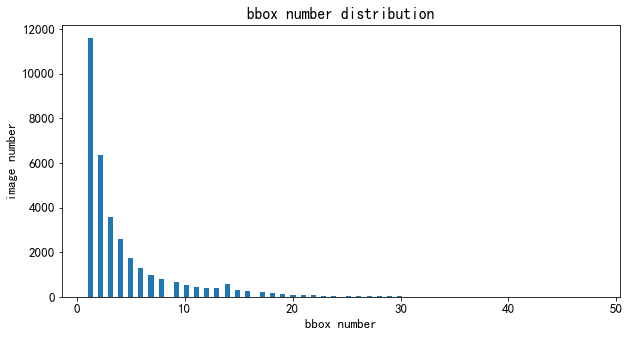

In [13]:
# plt画出bbox的数量分布
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
# 调整字体大小
plt.rcParams['font.size'] = 13
plt.figure(figsize=(10, 5))
plt.hist(bbox_num.values(), bins=100)
plt.ylabel('image number')
plt.xlabel('bbox number')
plt.title('bbox number distribution')
plt.show()

## 种类

这里我们一共有二十一个类别

In [14]:
# 类别信息
print('4.categories:') 
print_dict(anno['categories'])

4.categories:
id : 0;  name : backpack;  
id : 1;  name : cup;  
id : 2;  name : bowl;  
id : 3;  name : banana;  
id : 4;  name : apple;  
id : 5;  name : orange;  
id : 6;  name : chair;  
id : 7;  name : couch;  
id : 8;  name : potted plant;  
id : 9;  name : bed;  
id : 10;  name : dining table;  
id : 11;  name : laptop;  
id : 12;  name : mouse;  
id : 13;  name : keyboard;  
id : 14;  name : cell phone;  
id : 15;  name : book;  
id : 16;  name : clock;  
id : 17;  name : vase;  
id : 18;  name : scissors;  
id : 19;  name : hair drier;  
id : 20;  name : toothbrush;  


### 统计数据集中每个类别的数量 

In [15]:
# 统计每个类别的数量
categories_id = [i for i in range(20)]
id_count = [0] * 21
categories_name = [categorie['name'] for categorie in anno['categories']]

# 统计每个类别的数量
for elem in anno['annotations']:
    id_count[elem['category_id']] += 1

In [16]:
# 直接打印
# for i in range(21):
#     print(categories_name[i].ljust(13, ' '), '|', str(id_count[i]).rjust(5, ' '))

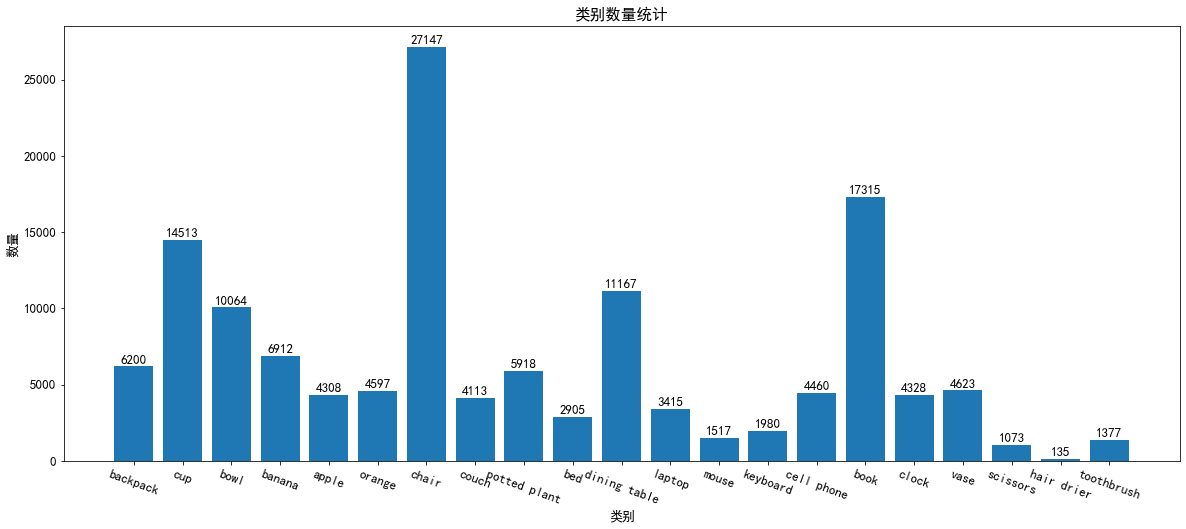

In [17]:
# 画直方图 在柱体上显示数值
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
# 调整字体大小
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

plt.figure(figsize=(20, 8))
plt.bar(categories_name, id_count)
plt.xticks(rotation=-20)
plt.xlabel('类别')
plt.ylabel('数量')
plt.title('类别数量统计')
for x, y in enumerate(id_count):
    plt.text(x, y+200, '%s' % y, ha='center')
plt.savefig('./类别标注数量统计.png')
plt.show()

## 可视化数据集

In [18]:
show_img_id = 0

# 找到show_img_id对应的图片
img = Image.open('./dl_detection/train/' + '%07d.jpg'%show_img_id)

# 找到show_img_id对应的所有标注
show_img_anno = []
for elem in anno['annotations']:
    if elem['image_id'] == show_img_id:
        show_img_anno.append(elem)

# 将标注中对应的bbox和label取出
show_img_bboxs = []
show_img_labels = []
for elem in show_img_anno:
    show_img_labels.append(elem['category_id'])
    show_img_bboxs.append(elem['bbox'])

In [19]:
len(show_img_bboxs), len(show_img_labels)

(3, 3)

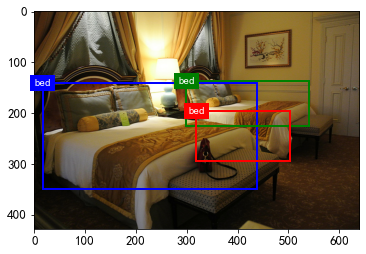

In [20]:
from utils.draw import draw_bboxs
draw_bboxs(
    img,
    show_img_bboxs,
    show_img_labels,
)

In [21]:
import gradio as gr
from utils.draw import draw_bboxs_with_conf
from utils.submit import bboxStrToList

# 定义输入输出函数
def show_train_sample_gr(
        show_id = 0, 
        fig_width = 20,
        fig_height = 10
    ):
    show_img_id = show_id

    # 找到show_img_id对应的图片
    img = Image.open('./dl_detection/train/' + '%07d.jpg'%show_img_id)
    
    # 找到show_img_id对应的所有标注
    show_img_anno = []
    for elem in anno['annotations']:
        if elem['image_id'] == show_img_id:
            show_img_anno.append(elem)

    # 将标注中对应的bbox和label取出
    show_img_bboxs = []
    show_img_labels = []
    for elem in show_img_anno:
        show_img_labels.append(elem['category_id'])
        show_img_bboxs.append(elem['bbox'])
    
    # 画出bbox
    plt.figure(figsize=(fig_width, fig_height))
    plt.axis('off')
    draw_bboxs(
        img,
        show_img_bboxs,
        show_img_labels,
    )

    return plt.gcf()

# 简单UI界面设计
with gr.Blocks() as demo:
    gr.Markdown("""
    # 查看训练集数据

    查看测试集中不同图片的标注信息

    - `img_idx`: 第几张图片

    > 使用`fig_width`和`fig_height`成比例的缩放直接可以得到标签字体变大变小的效果
    """)
    with gr.Column():
        with gr.Row():
            img_idx = gr.inputs.Slider(minimum=0, maximum=len(anno['images'])-1, step=1, default=0, label="img_idx")
        with gr.Row():
            fig_width = gr.inputs.Slider(minimum=1, maximum=50, step=1, default=20, label="fig_width")
            fig_height = gr.inputs.Slider(minimum=1, maximum=50, step=1, default=10, label="fig_height")
    with gr.Row():
        submit_button = gr.Button(label="submit")
    
    
    img_plot = gr.Plot()

    submit_button.click( 
        show_train_sample_gr , 
        inputs=[img_idx, fig_width, fig_height], 
        outputs=img_plot
    )

demo.launch()

d:\anaconda\lib\site-packages\gradio\inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
